In [1]:
# Data set: Online Retail
# Las variables contenidas en este conjunto de datos son:
# InvoiceNo: Número de factura. Un número entero de 6 dígitos asignado de forma única a cada transacción. Si este 
# código comienza con la letra 'c', indica una cancelación.

# StockCode: Código de producto. Un número entero de 5 dígitos asignado de forma única a cada producto distinto.
# Description: Nombre del producto.
# Quantity: Cantidades de cada producto por transacción.
# InvoiceDate: Fecha y hora de la factura. El día y la hora en que se generó cada transacción.
# UnitPrice: Precio por unidad. Precio del producto por unidad en libras esterlinas.
# CustomerID: Número de cliente. Un número entero de 5 dígitos asignado de forma única a cada cliente.
# Country: Nombre del país. El nombre del país donde reside cada cliente.

# Objetivo: Comprender el funcionamiento del algoritmo de K-Means aplicándolo en un conjunto de datos real de comercio 
# electrónico con el fin de identificar perfiles de clientes y optimizar las estrategias de marketing para incrementar 
# las ganancias anuales. Recuerde que el ciclo de vida de un proyecto no es lineal, requiere ir y volver.



In [2]:
# 1. Comenten el conjunto de datos y discuta las razones para utilizar el algoritmo de K-Means y cómo puede ayudar a la empresa.

# Las razones para utilizar el algoritmo de K-Means es que es un algoritmo de aprendizaje no supervisado que se utiliza para
# agrupar datos. El algoritmo funciona dividiendo un conjunto de datos en grupos que están más cerca entre sí que con todos
# los demás puntos de datos del conjunto de datos. El algoritmo de K-Means se puede utilizar para encontrar grupos dentro de
# los datos sin ninguna etiqueta previa. El algoritmo de K-Means es un algoritmo de agrupamiento iterativo que intenta
# asignar cada punto de datos a un grupo uno a la vez. El algoritmo de K-Means funciona de la siguiente manera:
# 1. Especifique el número de grupos que se crearán.
# 2. Inicialice los centroides (puntos de datos) de los grupos de forma aleatoria.
# 3. Asigne cada punto de datos al centroide más cercano mediante el cálculo de su distancia euclidiana.
# 4. Calcule el centroide de cada grupo.
# 5. Repita los pasos 3 y 4 hasta que los centroides ya no cambien.


In [3]:
# 2. Cargue el conjunto de datos de transacciones y realizar un análisis exploratorio de los datos para entender su estructura
#  y las variables disponibles. Explique la estructura y utilidad del dataset.

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Cargar el conjunto de datos
df = pd.read_csv('OnlineRetail.csv', sep=',', encoding='latin-1')

print(df.head())
print()
print(df.info())
print()
print(df.describe())
print()
print(df.shape)
print()
print(df.columns)
print()



  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0  

In [4]:
# 3. Limpie y transforme los datos según sea necesario. Esto puede implicar la eliminación de valores faltantes, 
# la conversión de variables categóricas en numéricas, la creación de nuevas variables (por ejemplo, total de ventas
#  por cliente), y la normalización o estandarización de las variables.

# Eliminar valores faltantes
df.dropna(inplace=True)

# Eliminar valores duplicados
df.drop_duplicates(inplace=True)

# Eliminar valores negativos
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)] # Eliminar valores negativos

# Convertir la variable InvoiceDate a formato fecha y hora considerando que el formato es dd/mm/aaaa hh:mm
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# convertir  a tipo string
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Country'] = df['Country'].astype(str)


# convertir  a tipo float
df['Quantity'] = df['Quantity'].astype(float)

# Crear la variable TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# quitar columnas que no se van a utilizar
df.drop(['InvoiceNo', 'UnitPrice','CustomerID'], axis=1, inplace=True)

# Crear la variable InvoiceYear
#df['InvoiceYear'] = df['InvoiceDate'].dt.year
#df['InvoiceMonth'] = df['InvoiceDate'].dt.month
#df['InvoiceDay'] = df['InvoiceDate'].dt.day
#df['InvoiceHour'] = df['InvoiceDate'].dt.hour
#df['InvoiceMinute'] = df['InvoiceDate'].dt.minute


print(df.info())
print()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    392692 non-null  object 
 1   Description  392692 non-null  object 
 2   Quantity     392692 non-null  float64
 3   InvoiceDate  392692 non-null  object 
 4   Country      392692 non-null  object 
 5   TotalPrice   392692 non-null  float64
dtypes: float64(2), object(4)
memory usage: 21.0+ MB
None

  StockCode                          Description  Quantity       InvoiceDate   
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0  01-12-2010 08:26  \
1     71053                  WHITE METAL LANTERN       6.0  01-12-2010 08:26   
2    84406B       CREAM CUPID HEARTS COAT HANGER       8.0  01-12-2010 08:26   
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  01-12-2010 08:26   
4    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0  01-12-2010 08:26   

          C

In [5]:
# comprobamos si quedan valores nulos

df.describe()
print('Valores nulos (is null)')
print(df.isnull().sum()) # no hay valores nulos
print()
print('Valores nulos (is isna)')
print(df.isna().sum()) # no hay valores nulos
print()
print(df.describe())
print()

Valores nulos (is null)
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Country        0
TotalPrice     0
dtype: int64

Valores nulos (is isna)
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Country        0
TotalPrice     0
dtype: int64

            Quantity     TotalPrice
count  392692.000000  392692.000000
mean       13.119702      22.631500
std       180.492832     311.099224
min         1.000000       0.001000
25%         2.000000       4.950000
50%         6.000000      12.450000
75%        12.000000      19.800000
max     80995.000000  168469.600000



In [6]:
# group by de StockCode
df_stockcode = df.groupby('StockCode').agg({'TotalPrice': 'sum'}).reset_index()
print(df_stockcode.head())
print()
print(df_stockcode.info())
print()
print(df_stockcode.describe())
print()
print(df_stockcode.shape)
print()
print(df_stockcode.columns)
print()


  StockCode  TotalPrice
0     10002      699.55
1     10080      114.41
2     10120       40.32
3    10123C        3.25
4    10124A        6.72

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StockCode   3665 non-null   object 
 1   TotalPrice  3665 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.4+ KB
None

          TotalPrice
count    3665.000000
mean     2424.886465
std      6569.584517
min         0.003000
25%       128.400000
50%       631.620000
75%      2069.200000
max    168469.600000

(3665, 2)

Index(['StockCode', 'TotalPrice'], dtype='object')



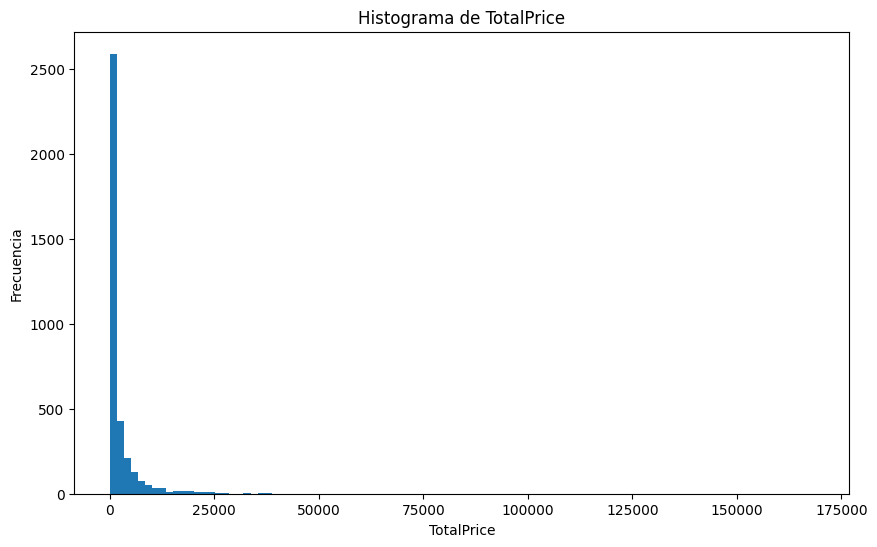

In [7]:
# 4. Visualice los datos y las relaciones entre las variables. Esto puede incluir histogramas, 
# gráficos de dispersión, y gráficos de caja. Justifique sus decisiones.

# Histograma de StockCode
plt.figure(figsize=(10, 6))
plt.hist(df_stockcode['TotalPrice'], bins=100)
plt.xlabel('TotalPrice')
plt.ylabel('Frecuencia')
plt.title('Histograma de TotalPrice')
plt.show()



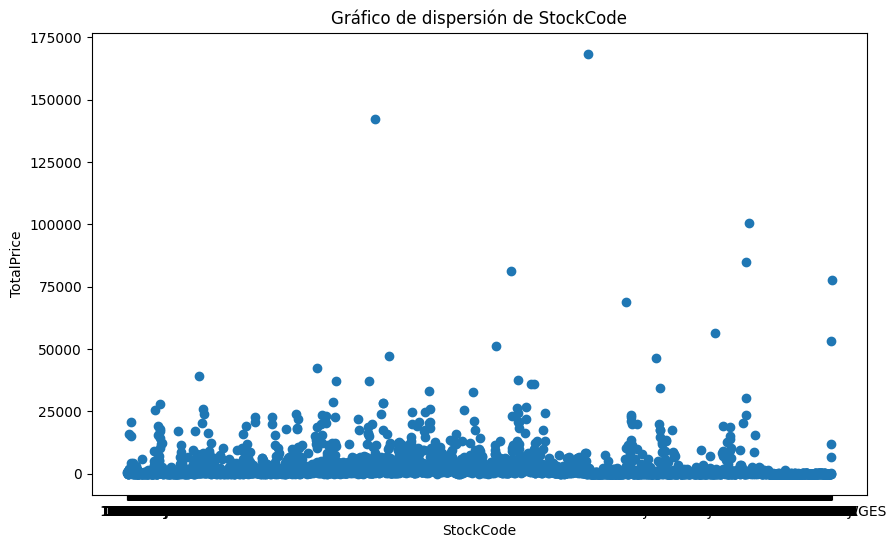

In [8]:
# Gráfico de dispersión de StockCode
plt.figure(figsize=(10, 6))
plt.scatter(df_stockcode['StockCode'], df_stockcode['TotalPrice'])
plt.xlabel('StockCode')
plt.ylabel('TotalPrice')
plt.title('Gráfico de dispersión de StockCode')
plt.show()


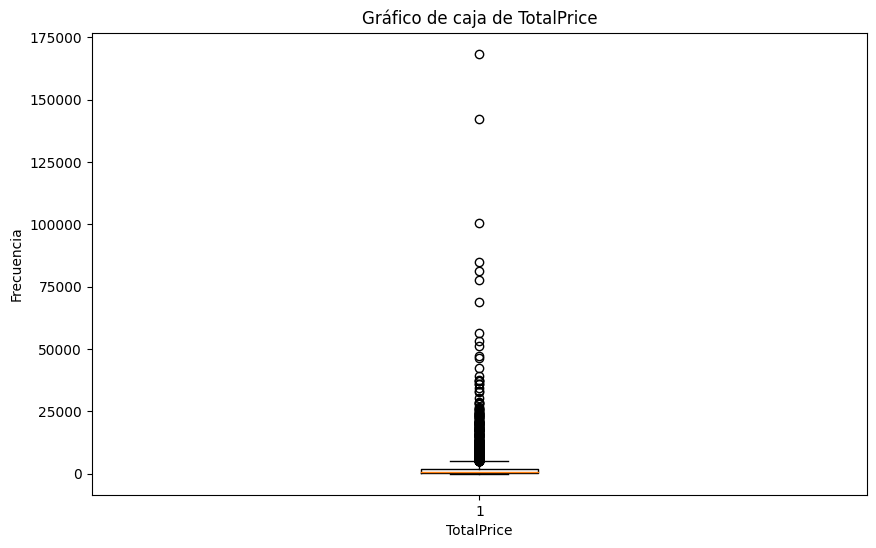

In [9]:
# Gráfico de caja de StockCode
plt.figure(figsize=(10, 6))
plt.boxplot(df_stockcode['TotalPrice'])
plt.xlabel('TotalPrice')
plt.ylabel('Frecuencia')
plt.title('Gráfico de caja de TotalPrice')
plt.show()

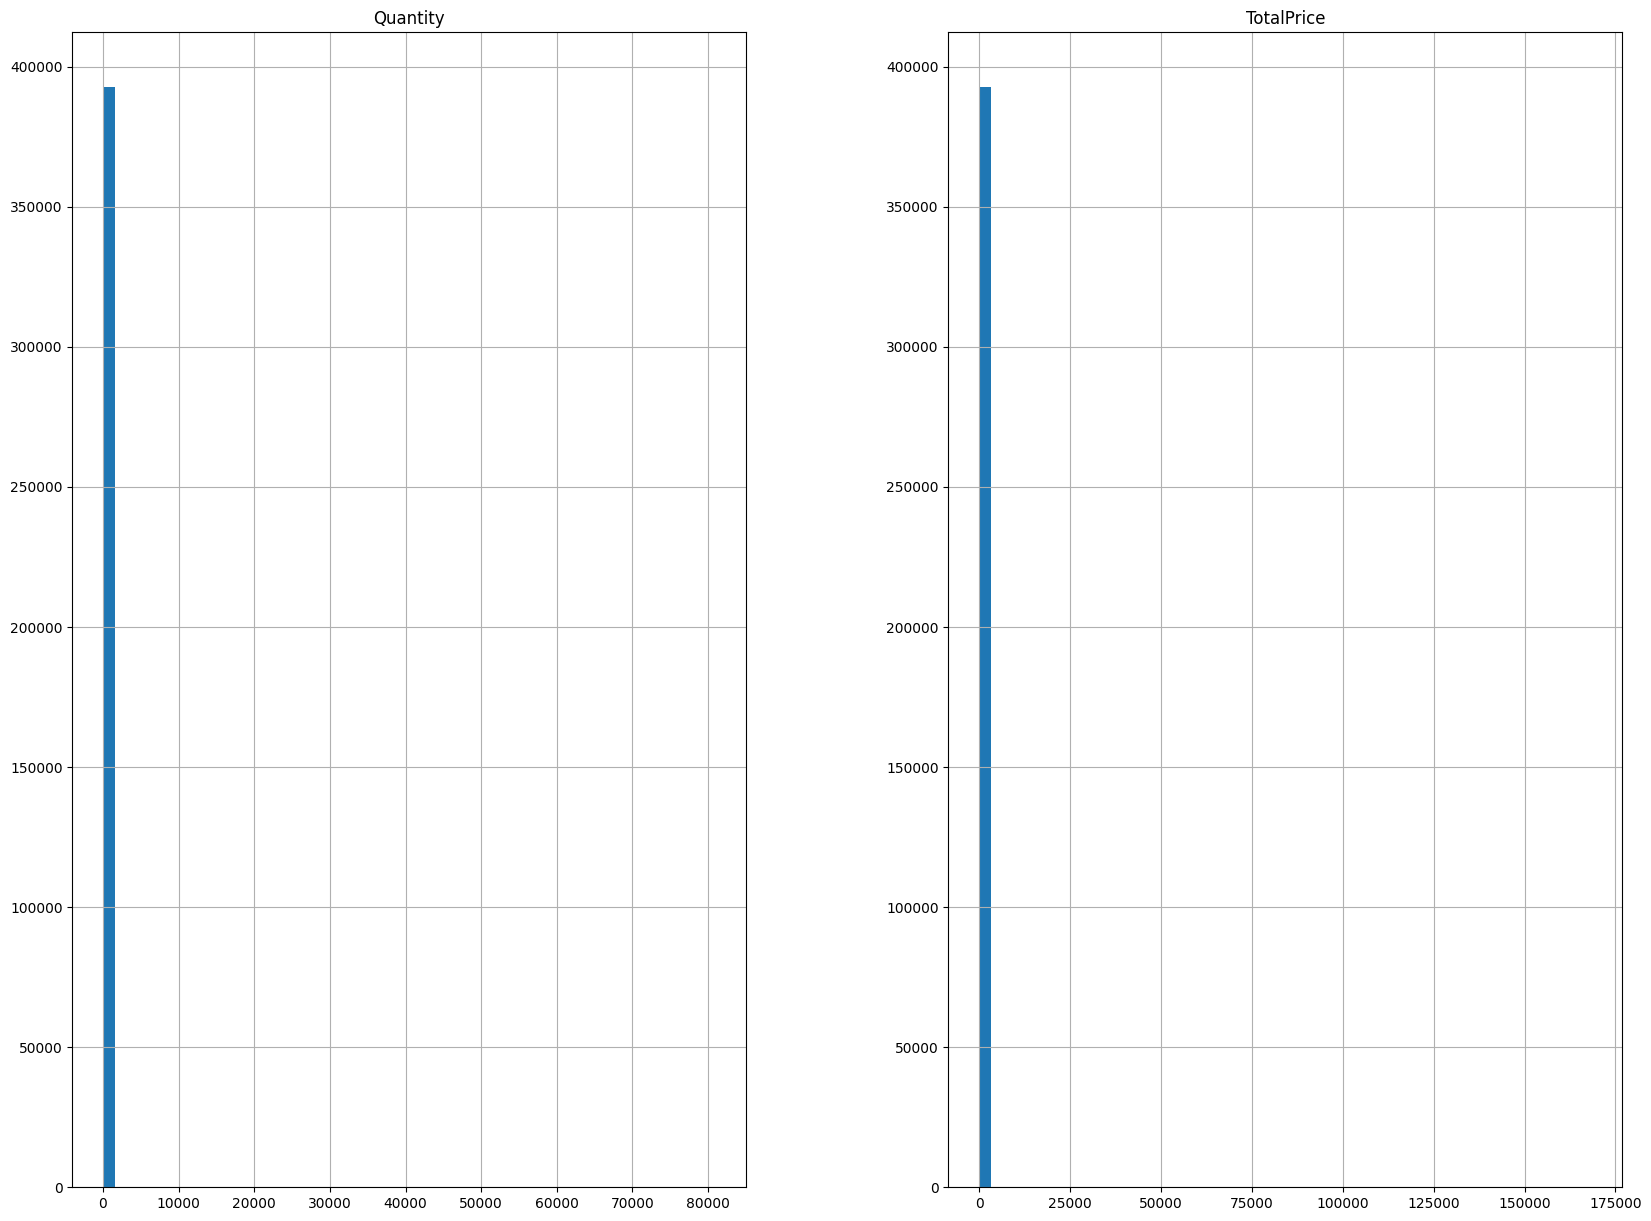

In [10]:
# agregar graficos histogramas
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()

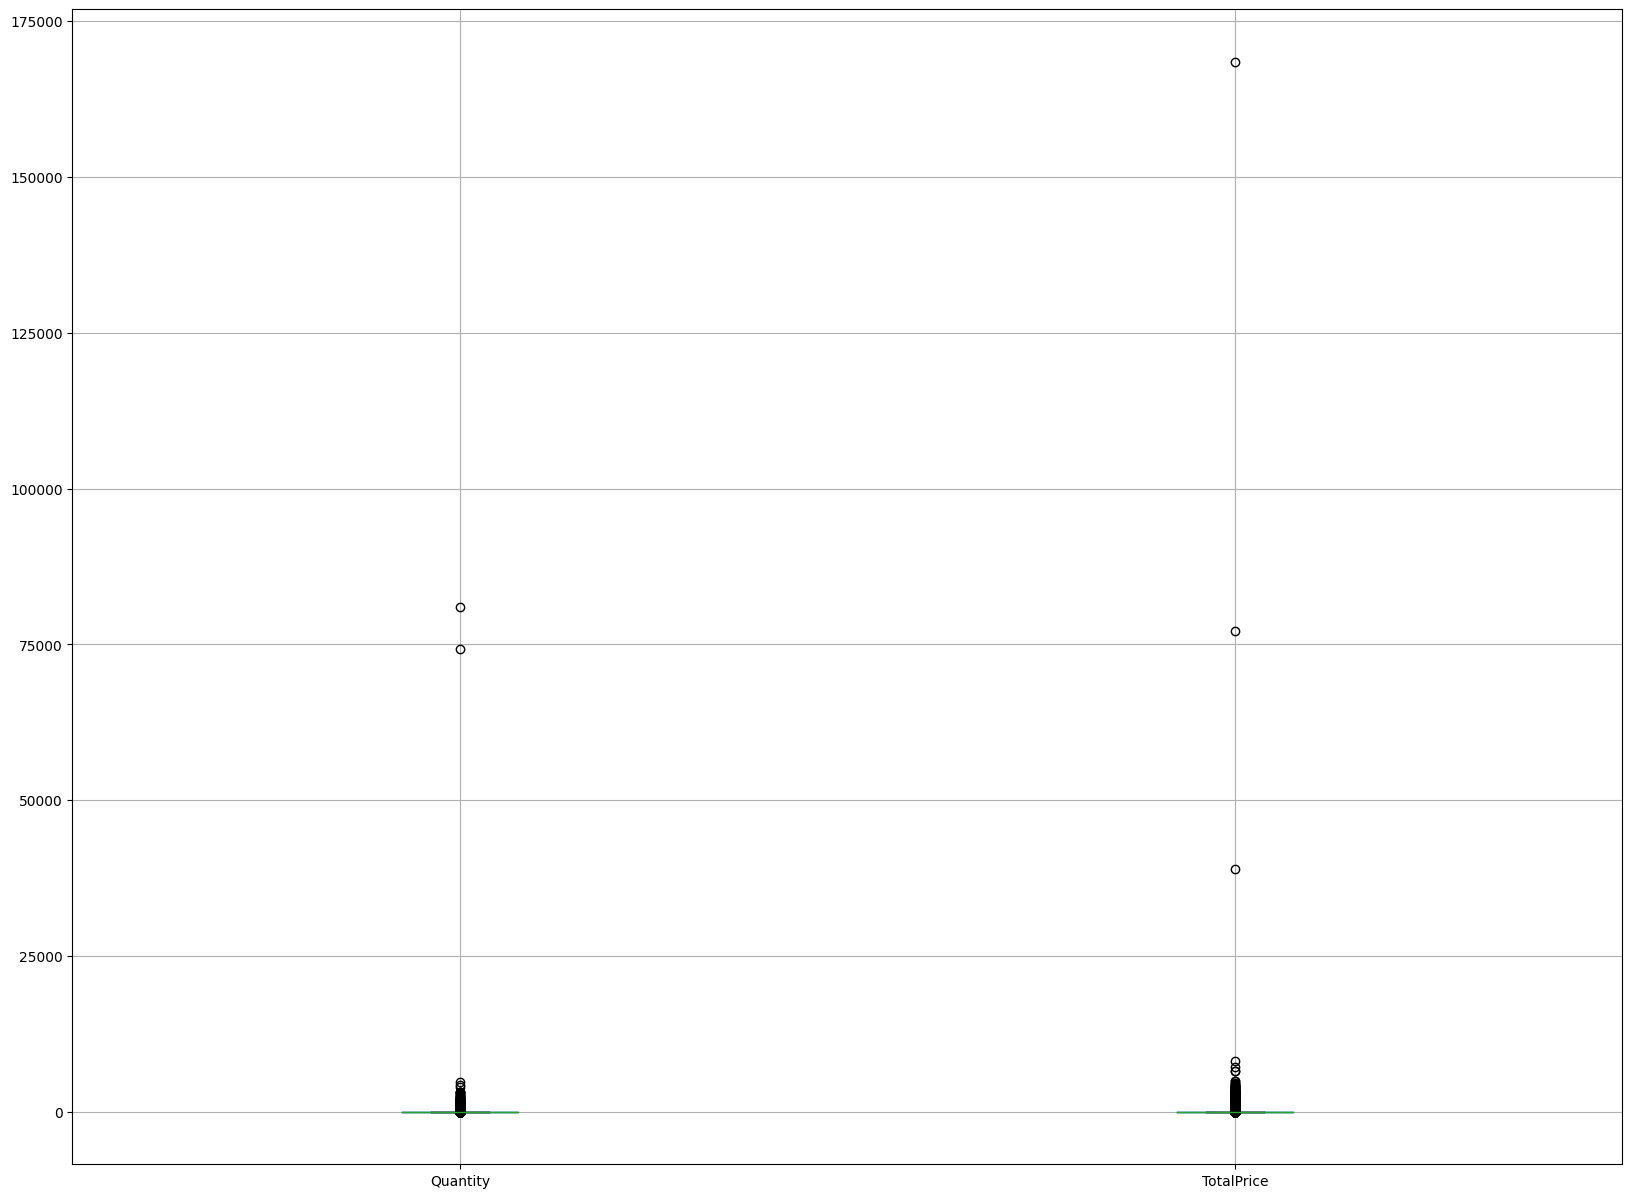

In [11]:
# agregar graficos de caja
df.boxplot(figsize=(20,15))
plt.show()


In [12]:
X=df

k = 3

# Fit the k-means model
kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)
kmeans.fit(X)

ValueError: could not convert string to float: '85123A'